In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import os 
import numpy as np

dirname=os.path.dirname(os.path.abspath('__file__'))
filename=os.path.join(dirname,'recipesData.json')
df=pd.read_json(filename)

notebook


In [2]:
df.head()


,_id,ratingData,name,datePublished,description,recipeYield,recipeIngredient,recipeInstructions,recipeCategory,nutrition,...,link,rating,img,prepTimeVal,cookTimeval,totalTimeVal,ratingCount,bestRating,worstRating,video
0,{'$oid': '5fc3b88113f48bef0f019a31'},"[{'rating': 5, 'count': 5, 'percentage': 50}, ...",Hot Artichoke Dip with Green Chiles,2018-03-21T16:16:59.000Z,Green chile peppers and garlic spice up this e...,4 cups,"[½ (16 ounce) jar creamy salad dressing, 1 clo...",[{'text': 'Preheat oven to 350 degrees F (175 ...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '47.4 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/23945/hot-ar...,4.400000,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,30,35,10,5,1,NaN
1,{'$oid': '5fc3b88113f48bef0f019a33'},"[{'rating': 5, 'count': 8, 'percentage': 62}, ...",Party Plentiful Guacamole,2019-07-10T07:00:48.000Z,This is a recipe my Mom always brings to the f...,9 cups,"[4 avocados - peeled, pitted and diced, 1 (8 o...",[{'text': 'Place the avocados into a mixing bo...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '86 calories', 'carbohydrateConte...",...,https://www.allrecipes.com/recipe/161178/party...,4.461538,https://imagesvc.meredithcorp.io/v3/mm/image?u...,15,0,15,13,5,1,NaN
2,{'$oid': '5fc3b88113f48bef0f019a36'},"[{'rating': 5, 'count': 11, 'percentage': 58},...",Magaricz,2000-08-15T14:05:21.000Z,This is my Russian grandmother's version of It...,10 servings,"[¼ cup olive oil, 1 large eggplant, peeled and...","[{'text': 'Place eggplant in a colander, light...","[Side Dish, Vegetables, Eggplant]","{'calories': '76.6 calories', 'carbohydrateCon...",...,https://www.allrecipes.com/recipe/20945/magaricz/,4.473684,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,40,120,19,5,1,NaN
3,{'$oid': '5fc3b88113f48bef0f019a37'},"[{'rating': 5, 'count': 8, 'percentage': 53}, ...",Christmas Chip Dip,2018-03-21T16:17:41.000Z,The simplest dip in festive colors for Christm...,16 servings,"[2 cups softened cream cheese, 1 (6.5 ounce) j...","[{'text': 'Spread cream cheese in a clear, sha...","[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '117.8 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/24301/christ...,4.333333,https://imagesvc.meredithcorp.io/v3/mm/image?u...,5,0,5,15,5,1,NaN
4,{'$oid': '5fc3b88113f48bef0f019a39'},"[{'rating': 5, 'count': 11, 'percentage': 61},...",Christmas Dip,2019-04-02T06:50:26.000Z,"A creamy layered dip that looks beautiful, esp...",4 cups,"[1 (6 ounce) package dried cranberries, 1 cup ...",[{'text': 'Reserve 1 tablespoon of dried cranb...,"[Appetizers and Snack Recipes, Dips and Spread...","{'calories': '142.1 calories', 'carbohydrateCo...",...,https://www.allrecipes.com/recipe/165246/chris...,4.277778,https://imagesvc.meredithcorp.io/v3/mm/image?u...,20,0,140,18,5,1,NaN


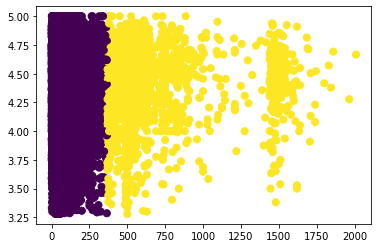

In [3]:
df=df[["rating","totalTimeVal"]]
#df.head()
df.sort_values(by=["totalTimeVal"])

from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df=df[df.totalTimeVal>0]

#df.describe()

kmeans = KMeans(n_clusters=2, random_state=0).fit(df)
y_kmeans = kmeans.predict(df)
# centers = kmeans.cluster_centers_
plt.scatter(df.iloc[:, 1], df.iloc[:,0], c=y_kmeans, s=50, cmap="viridis")
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
#y_kmeans